<a href="https://colab.research.google.com/github/MohamadTaghizadeh/TransferLearning/blob/main/Transfer_Learning_using_TensorFlow_with_the_cats_and_dogs_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer Learning using TensorFlow with the cats and dogs dataset

import packages and download data

In [1]:
import os
from skimage import color
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator

sns.set()

In [2]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [3]:
!nvidia-smi

Wed Oct  6 22:10:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O ./cats_and_dogs_filtered.zip

--2021-10-06 22:11:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.182.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M   186MB/s    in 0.4s    

2021-10-06 22:11:08 (186 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
dataset_path = "./cats_and_dogs_filtered.zip"

In [6]:
zip_object = zipfile.ZipFile(file=dataset_path, mode="r")

In [7]:
zip_object.extractall()

In [8]:
zip_object.close()

In [9]:
dataset_path_new = "./cats_and_dogs_filtered/"

(374, 500, 3)
The dimensions of the image are 374 pixels width and 500 pixels height, three single color channel
The maximum pixel value is 255 and the minimum is 0
The mean value of the pixels is 119.7826 and the standard deviation is 82.3396

(375, 499, 3)
The dimensions of the image are 375 pixels width and 499 pixels height, three single color channel
The maximum pixel value is 255 and the minimum is 0
The mean value of the pixels is 116.7904 and the standard deviation is 50.9613



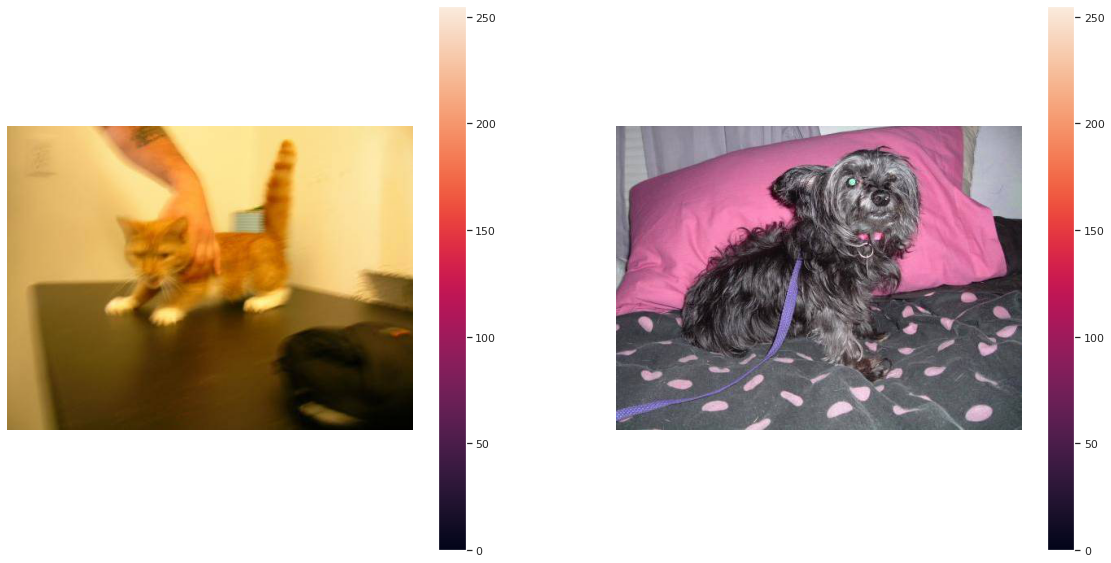

In [10]:
img_dir = dataset_path_new + '/train/'
cat = 'cats/cat.0.jpg'
dog = 'dogs/dog.0.jpg'
images = [cat, dog]
plt.figure(figsize=(20,10))

for i in range(2):
    plt.subplot(1, 2, i + 1)
    img = plt.imread(os.path.join(img_dir, images[i]))
    plt.imshow(img)
    plt.axis('off')
    plt.colorbar()
    print(img.shape)
    print(f"The dimensions of the image are {img.shape[0]} pixels width and {img.shape[1]} pixels height, three single color channel")
    print(f"The maximum pixel value is {img.max()} and the minimum is {img.min():}")
    print(f"The mean value of the pixels is {img.mean():.4f} and the standard deviation is {img.std():.4f}")
    print()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


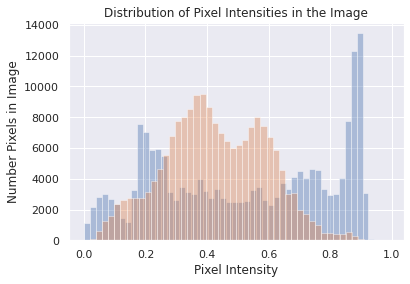

In [11]:
for i in range(2):
    rgb_img = plt.imread(os.path.join(img_dir, images[i]))
    grayscale_img = color.rgb2gray(rgb_img)
    sns.distplot(grayscale_img.ravel(), kde=False)
    plt.title('Distribution of Pixel Intensities in the Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Number Pixels in Image')

Data preparation

In [12]:
train_dir = os.path.join(dataset_path_new, "train")
validation_dir = os.path.join(dataset_path_new, "validation")

In [13]:
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)

In [14]:
train_generator = data_gen_train.flow_from_directory(train_dir, target_size=(128,128), 
                                                     batch_size=128, class_mode="binary")

Found 2000 images belonging to 2 classes.


In [15]:
valid_generator = data_gen_valid.flow_from_directory(validation_dir, target_size=(128,128), 
                                                     batch_size=128, class_mode="binary")

Found 1000 images belonging to 2 classes.


Model

In [16]:
IMG_SHAPE = (128, 128, 3)

In [17]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, 
                                            weights="imagenet")

9420800/9406464 [==============================] - 0s 0us/step


In [18]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [19]:
base_model.trainable = False

In [20]:
base_model.output

<KerasTensor: shape=(None, 4, 4, 1280) dtype=float32 (created by layer 'out_relu')>

In [21]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [22]:
prediction_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(global_average_layer)

In [23]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [25]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="binary_crossentropy",
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:
history = model.fit_generator(train_generator, epochs=100, validation_data=valid_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
16/16 [==============================] - 43s 701ms/step - loss: 0.7253 - accuracy: 0.5785 - val_loss: 0.6676 - val_accuracy: 0.6120
Epoch 2/100
16/16 [==============================] - 9s 584ms/step - loss: 0.6187 - accuracy: 0.6715 - val_loss: 0.5841 - val_accuracy: 0.6830
Epoch 3/100
16/16 [==============================] - 9s 583ms/step - loss: 0.5434 - accuracy: 0.7315 - val_loss: 0.5154 - val_accuracy: 0.7370
Epoch 4/100
16/16 [==============================] - 9s 587ms/step - loss: 0.4797 - accuracy: 0.7835 - val_loss: 0.4572 - val_accuracy: 0.7970
Epoch 5/100
16/16 [==============================] - 9s 587ms/step - loss: 0.4258 - accuracy: 0.8165 - val_loss: 0.4082 - val_accuracy: 0.8440
Epoch 6/100
16/16 [==============================] - 9s 601ms/step - loss: 0.3801 - accuracy: 0.8480 - val_loss: 0.3664 - val_accuracy: 0.8670
Epoch 7/100
16/16 [==============================] - 9s 587ms/step - loss: 0.3423 - accuracy: 0.8750 - val_loss: 0.3311 - val_accuracy: 0.892

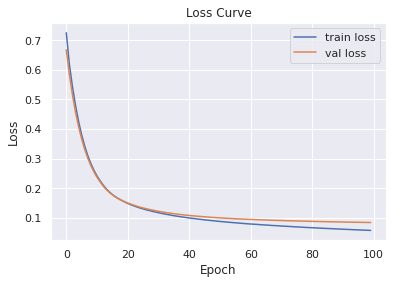

In [27]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss Curve')
plt.show()

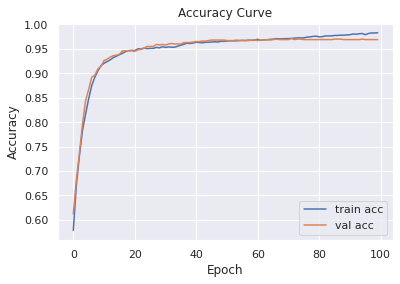

In [28]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Accuracy Curve')
plt.show()

#Model Fine-tuning 

In [29]:
base_model.trainable = True

In [30]:
len(base_model.layers)

154

In [31]:
fine_tune_at = 120

In [32]:
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [33]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [34]:
history = model.fit_generator(train_generator, epochs=3, validation_data=valid_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
16/16 [==============================] - 17s 657ms/step - loss: 0.1288 - accuracy: 0.9495 - val_loss: 0.0695 - val_accuracy: 0.9770
Epoch 2/3
16/16 [==============================] - 9s 593ms/step - loss: 0.0166 - accuracy: 0.9995 - val_loss: 0.0747 - val_accuracy: 0.9750
Epoch 3/3
16/16 [==============================] - 9s 596ms/step - loss: 0.0141 - accuracy: 0.9975 - val_loss: 0.0736 - val_accuracy: 0.9730


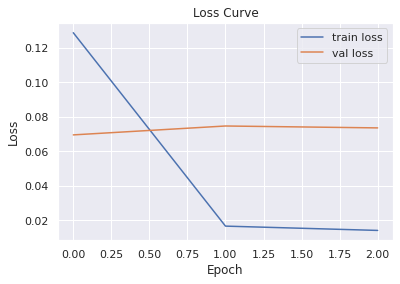

In [35]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss Curve')
plt.show()

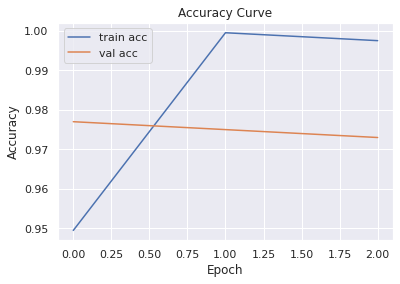

In [36]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Accuracy Curve')
plt.show()